In [1]:
pacman::p_load(ggplot2,ggpubr,phylotools,geiger,ggtreeExtra,data.table,
               phytools,phyloseq,ggtree,ape,grid,tidyr,wesanderson,aplot,
               ggnewscale,stringr,lubridate,ggridges,patchwork,ggstance,dendextend,tidyverse,ggupset)

## Basic structure of the tree data cleanup

In [156]:
tree_file_loc="<path_to_treefile_from_snakemake?"
tree_file <- as.phylo(ggtree(read.tree(tree_file_loc),
                                       layout="circular"))
tree_plot <- as.data.frame(tree_file %>% fortify() %>%
                               as_tibble()) 
# you need the path to the taxonomy tables for Phaeocystis and MarRef + MMETSP that you used for this analysis
input_tree_dict = read.csv("tax-table.txt") %>% 
        dplyr::bind_rows(read.csv("mmetsp-tax.txt",sep="\t")) %>%
        dplyr::bind_rows(read.csv("phaeo-taxonomy-table.txt",sep="\t") %>%
                         dplyr::mutate(Labels=paste0(Source_ID,"-phaeo"))) %>%
    dplyr::mutate(Labels=case_when(grepl("MMETSP",Labels) ~ paste0(Labels,"-mmetsp"),
                                         TRUE ~ Labels))

## JGI outgroup

In [158]:
tree_file <- as.phylo(ggtree(root(read.tree(tree_file_loc),
                                  outgroup="Oxytri1-genome"),
                                  layout="circular"))

tree_plot <- as.data.frame(tree_file %>% fortify() %>%
                               as_tibble()) 
input_tree_dict = read.csv("tax-table.txt") %>% 
        dplyr::bind_rows(read.csv("mmetsp-tax.txt")) %>%
        dplyr::bind_rows(data.frame("Labels"=c("Phaant1","Phaglo1","Oxytri1",
                                               "Chrsp","Guith1","busco_rmdup_PhaeoCCB-phaeo"),
                                    "Domain"=c("Eukaryota","Eukaryota","Eukaryota",
                                              "Eukaryota","Eukaryota","Eukaryota"),
                                    "Phylum"=c("Haptophyta","Haptophyta","Ciliophora",
                                              "Haptophyta","Cryptophyta","Haptophyta"),
                                    "Class"=c("Prymnesiophyceae","Prymnesiophyceae","Spirotrichea",
                                              "Eukaryota","Cryptophyceae","Prymnesiophyceae"),
                                    "Order"=c("Phaeocystales","Phaeocystales","Sporadotrichida",
                                              "Prymnesiales","Pyrenomonadales","Phaeocystales"),
                                    "Family"=c("Phaeocystaceae","Phaeocystaceae","Oxytrichidae",
                                              "Chrysochromulinaceae","Geminigeraceae","Phaeocystaceae"),
                                    "Genus"=c("Phaeocystis","Phaeocystis","Oxytricha",
                                              "Chrysochromulina","Guillardia","Phaeocystis"),
                                    "Species"=c("Phaeocystis antarctica",
                                                "Phaeocystis globosa",
                                                "Oxytricha trifallax",
                                                "Chrysochromulina tobinii","Guillardia theta",
                                                "Phaeocystis pouchetii"))) %>%
        dplyr::bind_rows(read.csv("phaeo-taxonomy-table.txt",sep="\t") %>%
                         dplyr::mutate(Labels=paste0(Source_ID,"-phaeo")))%>%
    dplyr::mutate(Labels=case_when(grepl("MMETSP",Labels) ~ paste0(Labels,"-mmetsp"),
                                         TRUE ~ Labels))

tree_plot <- tree_plot %>% tidyr::separate(label,sep="-genome",into=c("label","extra")) %>%
    dplyr::left_join(input_tree_dict,by=c("label"="Labels"))


unique_phyla = unique(input_tree_dict$Phylum)
unique_phyla = unique_phyla[unique_phyla != ""]

# change this line
tip_colors <- lapply(unique_phyla, function(x)
{tree_plot$label[grepl(paste(x, collapse="|"),
                         tree_plot$Phylum)]})
names(tip_colors) <- unique_phyla
tip_colors <- Filter(function(x) length(x) > 0, tip_colors)
for_input = as.phylo(ggtree(tree_plot))
tree_to_plot <- for_input

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 26 rows [1, 2, 3, 4, 5, 7, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, ...].”


In [160]:
p2<-ggtree(tree_plot,aes(color=Order),
       layout="rectangular") + geom_tiplab(aes(label=paste(label,Genus,
                                                           Species,
                                                           sep=" ")),size=2) +
    geom_text(aes(label=node),color="black") + 
    theme_bw(base_size=12) +
    scale_color_manual(values=c("#952267",
"#daaa00",
"#7b50d7",
"#e27800",
"#a7a9ff",
"#feb875",
"#00a4ae",
"#ff7587",
"#7f4227"),
    breaks=unique((tree_plot %>% dplyr::filter(!is.na(Order)))$Order),
    labels=unique((tree_plot %>% dplyr::filter(!is.na(Order)))$Order))


Scale for fill is already
present.
Adding another scale for
fill, which will replace
the existing scale.


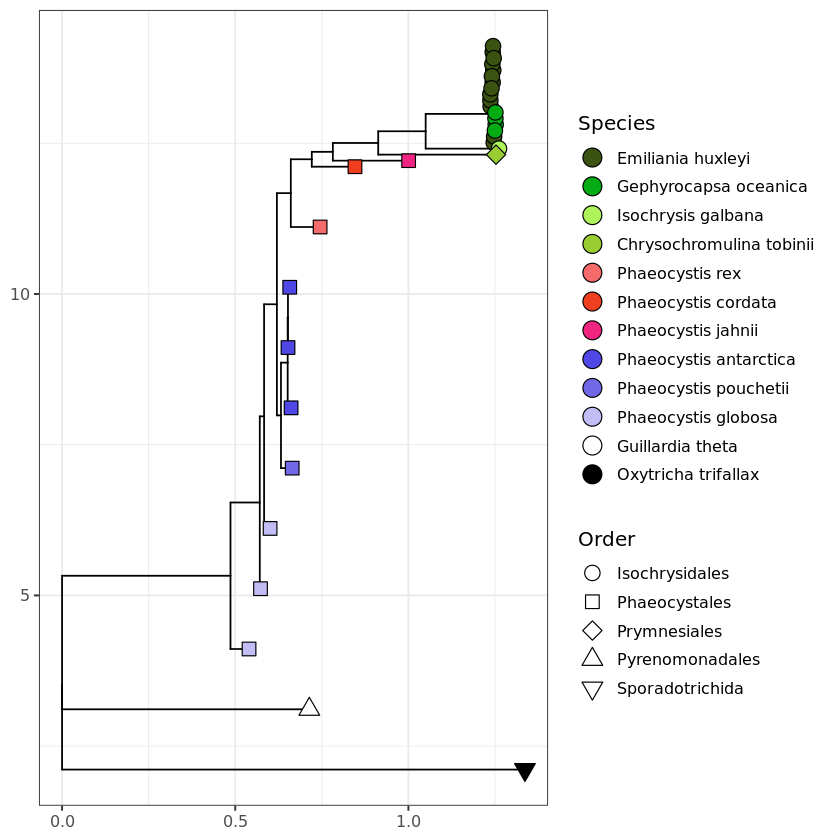

In [161]:
input_tree_dict = read.csv("tax-table.txt") %>% 
        dplyr::bind_rows(read.csv("mmetsp-tax.txt")%>%dplyr::mutate(Species=paste(Genus,Species,sep=" "))) %>%
        dplyr::bind_rows(data.frame("Labels"=c("Phaant1-genome","Phaglo1-genome","Oxytri1-genome",
                                               "Chrsp-genome","Guith1-genome","busco_rmdup_PhaeoCCB-phaeo"),
                                    "Domain"=c("Eukaryota","Eukaryota","Eukaryota",
                                              "Eukaryota","Eukaryota","Eukaryota"),
                                    "Phylum"=c("Haptophyta","Haptophyta","Ciliophora",
                                              "Haptophyta","Cryptophyta","Haptophyta"),
                                    "Class"=c("Prymnesiophyceae","Prymnesiophyceae","Spirotrichea",
                                              "Eukaryota","Cryptophyceae","Prymnesiophyceae"),
                                    "Order"=c("Phaeocystales","Phaeocystales","Sporadotrichida",
                                              "Prymnesiales","Pyrenomonadales","Phaeocystales"),
                                    "Family"=c("Phaeocystaceae","Phaeocystaceae","Oxytrichidae",
                                              "Chrysochromulinaceae","Geminigeraceae","Phaeocystaceae"),
                                    "Genus"=c("Phaeocystis","Phaeocystis","Oxytricha",
                                              "Chrysochromulina","Guillardia","Phaeocystis"),
                                    "Species"=c("Phaeocystis antarctica",
                                                "Phaeocystis globosa",
                                                "Oxytricha trifallax",
                                              "Chrysochromulina tobinii","Guillardia theta",
                                                "Phaeocystis pouchetii"))) %>%
        dplyr::bind_rows(read.csv("phaeo-taxonomy-table.txt",sep="\t") %>%
                         dplyr::mutate(Labels=paste0(Source_ID,"-phaeo")) %>%
                         dplyr::mutate(Species=case_when(Labels=="P_sp_ccmp2710-phaeo"~"Phaeocystis globosa",
                                                         Labels=="P_pouchetii_CCB-phaeo"~"Phaeocystis pouchetii",
                                                         TRUE ~ Species))) %>%
    dplyr::mutate(Labels=case_when(grepl("MMETSP",Labels) ~ paste0(Labels,"-mmetsp"),
                                         TRUE ~ Labels))


get_order <- function(input,tax_label="Order") {
    filtered_labels = c()
    for (curr in input) {
        filtered_label = input_tree_dict %>% dplyr::filter(Labels==curr)
        filtered_labels = c(filtered_labels,as.character(filtered_label[tax_label][1]))
    }
    return(filtered_labels)
}
p<-ggtree(as.phylo(ggtree(root(read.tree(tree_file_loc),
                               outgroup="Oxytri1-genome"),
                               layout="circular")),
       layout="rectangular") + 
    geom_tippoint(aes(shape=get_order(label),fill=get_order(label,tax_label="Species")),size=4) +
    scale_shape_manual(values=c(21,22,23,24,25),name="Order") + 
    scale_fill_discrete(name="Species") + 
    theme_bw(base_size=12) +
    scale_fill_manual(values=c("#3a5311",
                               "#03AC13","#AEF359",
                               "#9ACD32","#F56A6A","#F03F1F","#F02581","#5048E6",
                               "#7068E6",
                               "#C2BDF5",
                               "white","black","gray"),
                      breaks=c("Emiliania huxleyi",
                               "Gephyrocapsa oceanica",
                               "Isochrysis galbana",
                               "Chrysochromulina tobinii",
                               "Phaeocystis rex",
                               "Phaeocystis cordata",
                               "Phaeocystis jahnii",
                               "Phaeocystis antarctica","Phaeocystis pouchetii",
                               "Phaeocystis globosa",
                               "Guillardia theta","Oxytricha trifallax"),
                      labels=c("Emiliania huxleyi",
                               "Gephyrocapsa oceanica",
                               "Isochrysis galbana",
                               "Chrysochromulina tobinii",
                               "Phaeocystis rex",
                               "Phaeocystis cordata",
                               "Phaeocystis jahnii",
                               "Phaeocystis antarctica","Phaeocystis pouchetii",
                               "Phaeocystis globosa",
                               "Guillardia theta","Oxytricha trifallax"),name="Species") + 
    scale_color_manual(values=c("#952267",
                                "#daaa00",
                                "#7b50d7",
                                "#e27800",
                                "#a7a9ff",
                                "#feb875",
                                "#00a4ae",
                                "#ff7587",
                                "#7f4227"),
    breaks=unique((tree_plot %>% dplyr::filter(!is.na(Order)) %>% dplyr::arrange(desc(y)))$Order),
    labels=unique((tree_plot %>% dplyr::filter(!is.na(Order))%>% dplyr::arrange(desc(y)))$Order)) +
    guides(fill = guide_legend(override.aes = list(shape = 21,size=5) ) )

scaled_tree <- scaleClade(p, node=35,#54, 
                          scale=.1) 
scaled_tree

Scale for fill is already
present.
Adding another scale for
fill, which will replace
the existing scale.


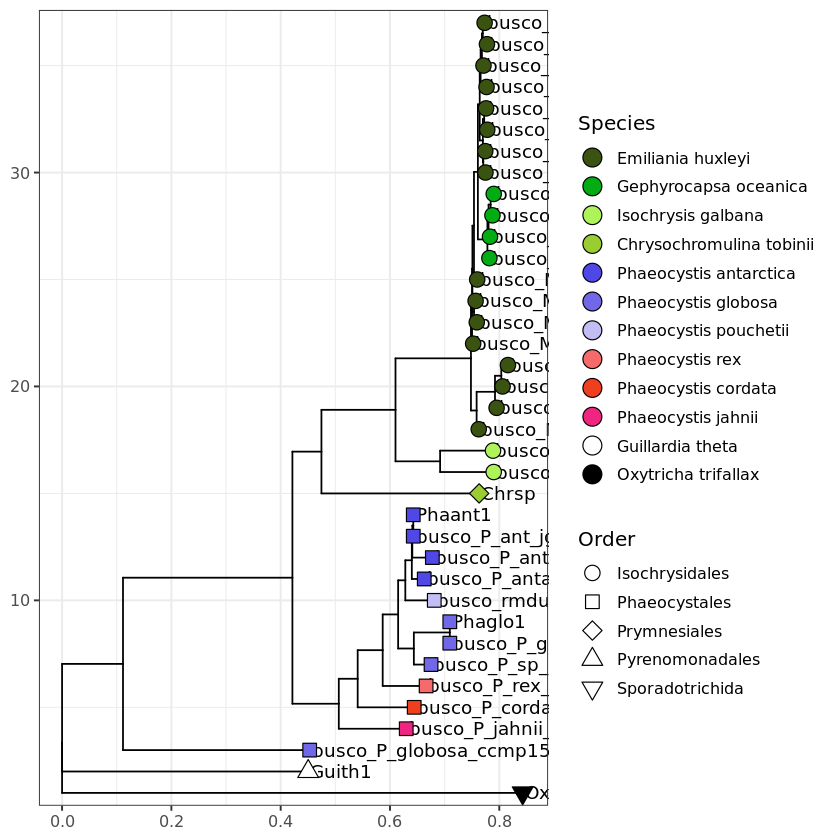

In [19]:
ggtree(as.phylo(ggtree(root(read.tree(tree_file_loc),
                               outgroup="Oxytri1"),
                               layout="circular")),
       layout="rectangular") + 
    geom_tiplab(aes(label=label)) + 
    geom_tippoint(aes(shape=get_order(label),fill=get_order(label,tax_label="Species")),size=4) +
    scale_shape_manual(values=c(21,22,23,24,25),name="Order") + 
    scale_fill_discrete(name="Species") + 
    theme_bw(base_size=12) +
    scale_fill_manual(values=c("#3a5311","#03AC13","#AEF359",
                               "#9ACD32","#5048E6",
                               "#7068E6",
                               "#C2BDF5",
                               "#F56A6A","#F03F1F","#F02581","white","black","gray"),
                      breaks=c("Emiliania huxleyi",
                               "Gephyrocapsa oceanica",
                               "Isochrysis galbana",
                               "Chrysochromulina tobinii",
                               "Phaeocystis antarctica",
                               "Phaeocystis globosa","Phaeocystis pouchetii",
                               "Phaeocystis rex",
                               "Phaeocystis cordata",
                               "Phaeocystis jahnii",
                               "Guillardia theta","Oxytricha trifallax"),
                      labels=c("Emiliania huxleyi",
                               "Gephyrocapsa oceanica",
                               "Isochrysis galbana",
                               "Chrysochromulina tobinii",
                               "Phaeocystis antarctica",
                               "Phaeocystis globosa","Phaeocystis pouchetii",
                               "Phaeocystis rex",
                               "Phaeocystis cordata",
                               "Phaeocystis jahnii",
                               "Guillardia theta","Oxytricha trifallax"),name="Species") + 
    scale_color_manual(values=c("#952267",
                                "#daaa00",
                                "#7b50d7",
                                "#e27800",
                                "#a7a9ff",
                                "#feb875",
                                "#00a4ae",
                                "#ff7587",
                                "#7f4227"),
    breaks=unique((tree_plot %>% dplyr::filter(!is.na(Order)) %>% dplyr::arrange(desc(y)))$Order),
    labels=unique((tree_plot %>% dplyr::filter(!is.na(Order))%>% dplyr::arrange(desc(y)))$Order)) +
    guides(fill = guide_legend(override.aes = list(shape = 21,size=5) ) )


## Read in the filter-phaeo data from `00-filter-phaeo`

In [11]:
filter_phaeo_data = data.frame(fread("combined_frame_filt.csv"))

In [14]:
input_tree_dict = read.csv("mmetsp-tax.txt") %>%
        dplyr::bind_rows(data.frame("Labels"=c("Phaant1","Phaglo1","Oxytri1",
                                               "Chrsp","Guith1","busco_rmdup_PhaeoCCB-phaeo"),
                                    "Domain"=c("Eukaryota","Eukaryota","Eukaryota",
                                              "Eukaryota","Eukaryota","Eukaryota"),
                                    "Phylum"=c("Haptophyta","Haptophyta","Ciliophora",
                                              "Haptophyta","Cryptophyta","Haptophyta"),
                                    "Class"=c("Prymnesiophyceae","Prymnesiophyceae","Spirotrichea",
                                              "Eukaryota","Cryptophyceae","Prymnesiophyceae"),
                                    "Order"=c("Phaeocystales","Phaeocystales","Sporadotrichida",
                                              "Prymnesiales","Pyrenomonadales","Phaeocystales"),
                                    "Family"=c("Phaeocystaceae","Phaeocystaceae","Oxytrichidae",
                                              "Chrysochromulinaceae","Geminigeraceae","Phaeocystaceae"),
                                    "Genus"=c("Phaeocystis","Phaeocystis","Oxytricha",
                                              "Chrysochromulina","Guillardia","Phaeocystis"),
                                    "Species"=c("Phaeocystis antarctica",
                                                "Phaeocystis globosa",
                                                "Oxytricha trifallax",
                                              "Chrysochromulina tobinii","Guillardia theta",
                                                "Phaeocystis pouchetii"))) %>%
        dplyr::bind_rows(read.csv("phaeo-taxonomy-table.txt",sep="\t") %>%
                         dplyr::mutate(Labels=paste0("busco_",Source_ID,"-phaeo"))) %>%
    dplyr::mutate(Labels=case_when(grepl("MMETSP",Labels) ~ paste0("busco_",Labels,"-mmetsp"),
                                         TRUE ~ Labels)) %>%
    dplyr::mutate(Species = case_when(Species=="huxleyi" ~ "Emiliania huxleyi",
                                      Species=="galbana" ~ "Isochrysis galbana",
                                      Species=="oceanica" ~ "Gephyrocapsa oceanica",
                                      Species=="Phaeocystis sp." ~ "Phaeocystis globosa",
                                      TRUE ~ Species))

get_order <- function(input,tax_label="Order") {
    filtered_labels = c()
    for (curr in input) {
        filtered_label = input_tree_dict %>% dplyr::filter(Labels==curr)
        filtered_labels = c(filtered_labels,as.character(filtered_label[tax_label][1]))
    }
    return(filtered_labels)
}
p<-ggtree(as.phylo(ggtree(root(read.tree("/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/code/jupyter-notebooks/extracted-phaeo/2022-11-25_2/trees/fasttree.nwk"),
                               outgroup="Oxytri1"),
                               layout="circular")),
       layout="rectangular") + 
    geom_tippoint(aes(shape=get_order(label),fill=get_order(label,tax_label="Species")),size=8) +
    scale_shape_manual(values=c(21,22,23,24,25),name="Order") + 
    scale_fill_discrete(name="Species") + 
    geom_text(aes(label=label),color="black") + 
    theme_bw(base_size=12) +
    scale_fill_manual(values=c("#3a5311","#03AC13","#AEF359",
                               "#9ACD32","#5048E6",
                               "#7068E6",
                               "#C2BDF5",
                               "#F56A6A","#F02581","#F03F1F","white","black","gray"),
                      breaks=c("Emiliania huxleyi",
                               "Gephyrocapsa oceanica",
                               "Isochrysis galbana",
                               "Chrysochromulina tobinii",
                               "Phaeocystis antarctica",
                               "Phaeocystis globosa","Phaeocystis pouchetii",
                               "Phaeocystis cordata",
                               "Phaeocystis jahnii","Phaeocystis rex",
                               "Guillardia theta","Oxytricha trifallax"),
                      labels=c("Emiliania huxleyi",
                               "Gephyrocapsa oceanica",
                               "Isochrysis galbana",
                               "Chrysochromulina tobinii",
                               "Phaeocystis antarctica",
                               "Phaeocystis globosa","Phaeocystis pouchetii",
                               "Phaeocystis cordata",
                               "Phaeocystis jahnii","Phaeocystis rex",
                               "Guillardia theta","Oxytricha trifallax"),name="Species") + 
    scale_color_manual(values=c("#952267",
"#daaa00",
"#7b50d7",
"#e27800",
"#a7a9ff",
"#feb875",
"#00a4ae",
"#ff7587",
"#7f4227"),
    breaks=unique((tree_plot %>% dplyr::filter(!is.na(Order)))$Order),
    labels=unique((tree_plot %>% dplyr::filter(!is.na(Order)))$Order)) +
    guides(fill = guide_legend(override.aes = list(shape = 21,size=3) ) )

Scale for fill is already
present.
Adding another scale for
fill, which will replace
the existing scale.


Joining, by =
c("parent",
"node")


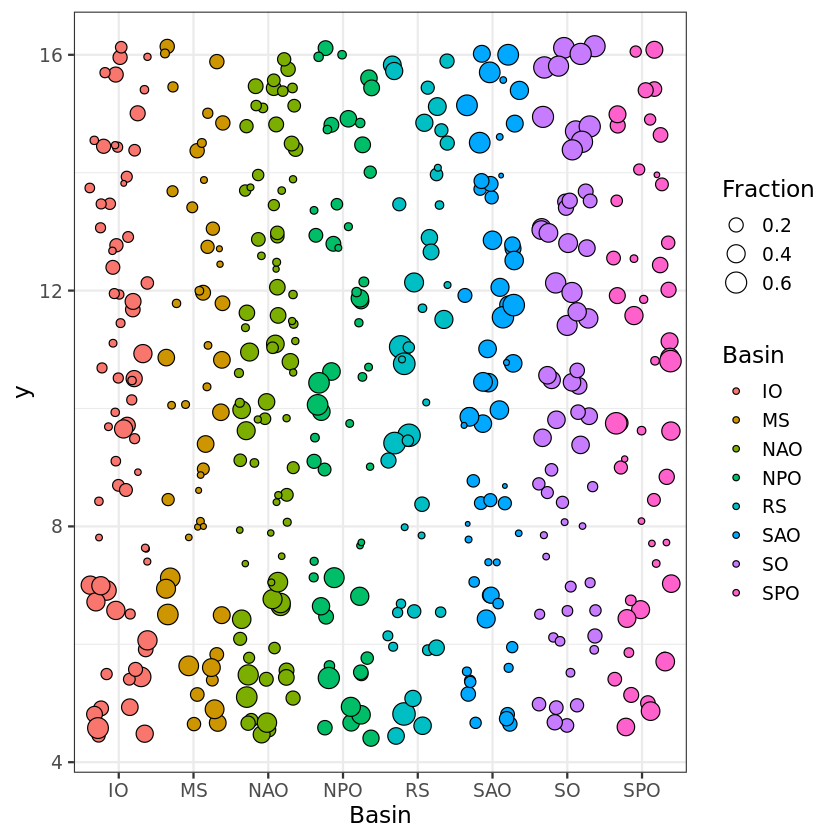

In [41]:
ggplot(as.phylo(ggtree(root(read.tree("/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/code/jupyter-notebooks/extracted-phaeo/2022-11-25_2/trees/fasttree.nwk"),
                               outgroup="Oxytri1"),
                               layout="circular")) %>% as_tibble() %>% 
    dplyr::left_join(ggplot_build(scaleClade(p, node=54, scale=.1))$data[[1]]) %>%
    dplyr::left_join(input_tree_dict%>%
                     dplyr::mutate(Labels=case_when(Source_ID=="P_pouchetii_CCB" ~ "busco_rmdup_PhaeoCCB-phaeo",
                                                                      TRUE ~ Labels),
                                  Source_ID=case_when(Labels=="Phaglo1" ~ "P_globosa_jgi",
                                                      Labels=="Phaant1" ~ "P_ant_jgi",
                                                                      TRUE ~ Source_ID)) %>%
                                                     dplyr::left_join(filter_phaeo_data%>% 
                                                                      dplyr::filter((Genus=="Phaeocystis"))%>%
                                                        dplyr::select(TaraSample,PhaeoDB,
                                                                     TotalBySamp,Fraction,
                                                                     Basin,SizeFract,
                                                                     PercDiff),
                                                        by=c("Source_ID"="PhaeoDB")),
                     by=c("label"="Labels"))  %>% dplyr::filter(!is.na(Basin)) %>%
    dplyr::distinct()) + 
    theme_bw(base_size=14) + 
    geom_jitter(aes(y = y, x = Basin, size = Fraction, fill = Basin),pch=21)

`summarise()`
has grouped
output by
'PhaeoDBCoord',
'SizeFract'.
You can
override using
the `.groups`
argument.


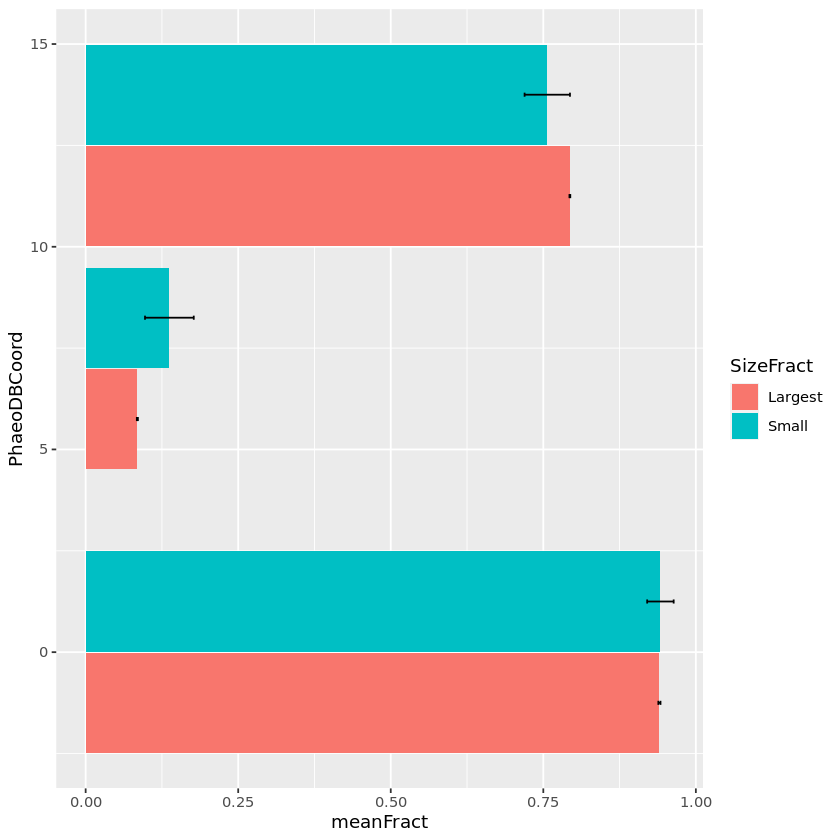

In [43]:
ggplot(filter_phaeo_data %>% dplyr::filter((PhaeoDB %in% c("phaeo_all","colonies_phaeo",
                                                   "free_phaeo")) & (Genus=="Phaeocystis") & (Basin=="SO")) %>%
          dplyr::mutate(PhaeoDBCoord = case_when(PhaeoDB == "free_phaeo" ~ 7,
                                                 PhaeoDB == "colonies_phaeo" ~ 12.5,
                                                 PhaeoDB == "phaeo_all" ~ 0)) %>%
           dplyr::group_by(PhaeoDBCoord,SizeFract,PhaeoDB) %>%
          dplyr::summarize(meanFract = mean(Fraction),sdFract = sd(Fraction))) + 
    geom_bar(aes(x = PhaeoDBCoord, y = meanFract, fill = SizeFract, group = paste0(PhaeoDB, SizeFract)),
            stat="identity",position=position_dodge(width = 5))+
    geom_errorbar(aes(x = PhaeoDBCoord, ymax = meanFract+sdFract, ymin = meanFract-sdFract, 
                      group = paste0(PhaeoDB, SizeFract)),
                  position=position_dodge(width=5),width=0.2)+ coord_flip()

Joining, by = c("parent",
"node")
`summarise()` has grouped
output by 'y'. You can
override using the
`.groups` argument.
Scale for x is already
present.
Adding another scale for
x, which will replace the
existing scale.
`summarise()` has grouped
output by 'PhaeoDBCoord',
'SizeFract'. You can
override using the
`.groups` argument.
Scale for y is already
present.
Adding another scale for
y, which will replace the
existing scale.
Warning message:
“Removed 2 rows containing
missing values
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing
missing values
(`geom_bar()`).”


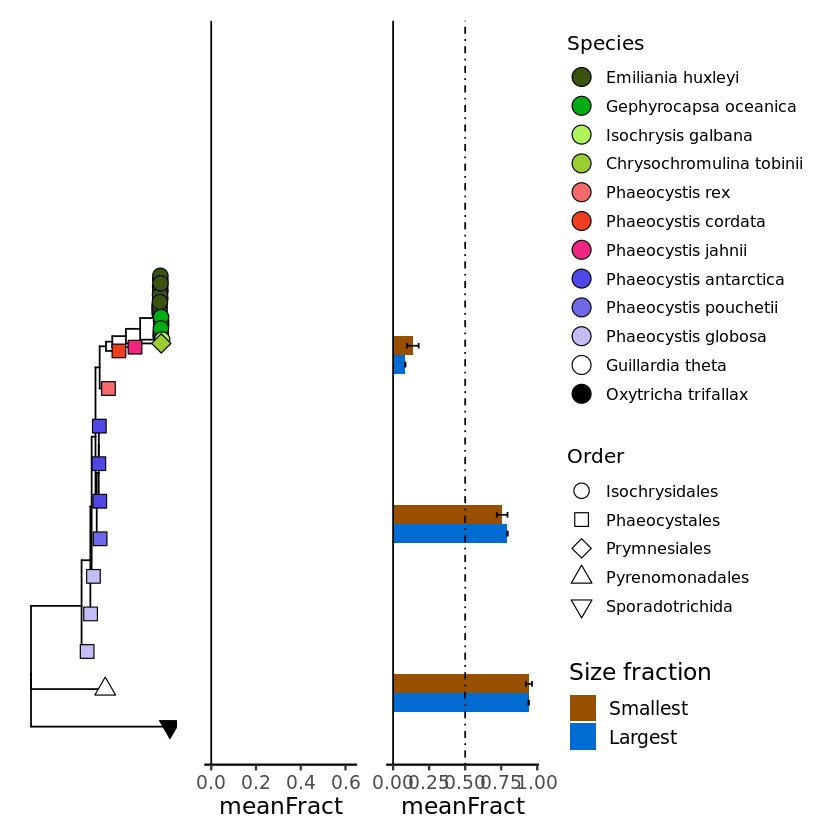

In [164]:
abund_vals = ggplot(as.phylo(ggtree(root(read.tree("/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/code/jupyter-notebooks/extracted-phaeo/2022-11-25_2/trees/fasttree.nwk"),
                               outgroup="Oxytri1"),
                               layout="circular")) %>% as_tibble() %>% 
    dplyr::left_join(ggplot_build(scaleClade(p, node=54, scale=.1))$data[[1]]) %>%
    dplyr::left_join(input_tree_dict%>%
                     dplyr::mutate(Labels=case_when(Source_ID=="P_pouchetii_CCB" ~ "busco_rmdup_PhaeoCCB-phaeo",
                                                                      TRUE ~ Labels),
                                   Source_ID=case_when(Labels=="Phaglo1" ~ "P_globosa_jgi",
                                                       Labels=="Phaant1" ~ "P_ant_jgi",
                                                       TRUE ~ Source_ID)) %>%
                                                     dplyr::left_join(filter_phaeo_data%>% 
                                                                      dplyr::filter((Genus=="Phaeocystis") &
                                                                                    (grepl("SO",TaraSample)))%>%
                                                        dplyr::select(TaraSample,PhaeoDB,
                                                                     TotalBySamp,Fraction,
                                                                     Basin,SizeFract,
                                                                     PercDiff),
                                                        by=c("Source_ID"="PhaeoDB")),
                     by=c("label"="Labels"))  %>% dplyr::filter(!is.na(Basin)) %>%
    dplyr::distinct() %>%
    dplyr::filter(grepl("SRF",TaraSample)|grepl("DCM",TaraSample)|grepl("MIX",TaraSample)) %>%
    dplyr::group_by(y, SizeFract) %>%
    dplyr::summarize(meanFract=mean(Fraction),sdFract=sd(Fraction))) + 
    theme_bw(base_size=14) + 
    geom_bar(aes(x = y, y = meanFract, fill = SizeFract, group = paste0(y, SizeFract)),
            stat="identity",position=position_dodge(width = 0.5),width=0.5)+
    geom_errorbar(aes(x = y, ymax = meanFract+sdFract, ymin = meanFract-sdFract, 
                      group = paste0(y, SizeFract)),
                  position=position_dodge(width=0.5),width=0.3)+ xlim(c(2,20)) + coord_flip()+ 
    #geom_jitter(aes(y = y, x = Basin, size = Fraction, fill = Basin, shape=SizeFract),height=0)+
    #geom_boxplot(aes(y = y, x = Fraction, color=SizeFract, fill = SizeFract, group=paste0(y,Basin,SizeFract))) + 
    #geom_point(aes(y = y, x = Fraction,fill = SizeFract, group=paste0(y,Basin,SizeFract)),
    #           color="black",pch=21,size=4,position=position_jitterdodge()) + 
    scale_shape_manual(values=c(21,22)) + 
    theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+xlim(c(2,20))+xlab("Fraction Phaeo\nsequences recovered") + 
    scale_fill_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction")+ 
    scale_color_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction") +
    geom_hline(aes(yintercept=0))

total_db_plot = ggplot(filter_phaeo_data %>% dplyr::filter((PhaeoDB %in% c("phaeo_all","colonies_phaeo",
                                                   "free_phaeo")) & (Genus=="Phaeocystis") & (Basin=="SO")) %>%
          dplyr::mutate(PhaeoDBCoord = case_when(PhaeoDB == "free_phaeo" ~ 12,
                                                 PhaeoDB == "colonies_phaeo" ~ 7.5,
                                                 PhaeoDB == "phaeo_all" ~ 3)) %>%
           dplyr::group_by(PhaeoDBCoord,SizeFract,PhaeoDB) %>%
          dplyr::summarize(meanFract = mean(Fraction),sdFract = sd(Fraction))) + 
    geom_bar(aes(x = PhaeoDBCoord, y = meanFract, fill = SizeFract, group = paste0(PhaeoDB, SizeFract)),
            stat="identity",position=position_dodge(width = 1),width=1)+
    geom_errorbar(aes(x = PhaeoDBCoord, ymax = meanFract+sdFract, ymin = meanFract-sdFract, 
                      group = paste0(PhaeoDB, SizeFract)),
                  position=position_dodge(width=1),width=0.3)+ xlim(c(2,20)) + coord_flip()+ 
    theme_bw(base_size=14) + 
    theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
    xlab("Fraction Phaeo\nsequences recovered") + 
    scale_fill_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction")+ 
    scale_color_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction")+
    geom_hline(aes(yintercept=0.5),linetype="dotdash")+
    geom_hline(aes(yintercept=0),linetype="solid")
    

((scaled_tree+theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.x=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "transparent"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+ylim(c(2,20)))|abund_vals|total_db_plot)+ 
        plot_layout(guides="collect",widths=c(1,1,1))

ggsave("phaeo_tree_w_data.pdf",width=8,height=10,units="in")

Joining, by = c("parent",
"node")
`summarise()` has grouped
output by 'y'. You can
override using the
`.groups` argument.
Scale for x is already
present.
Adding another scale for
x, which will replace the
existing scale.
`summarise()` has grouped
output by 'PhaeoDBCoord',
'SizeFract'. You can
override using the
`.groups` argument.
Scale for y is already
present.
Adding another scale for
y, which will replace the
existing scale.
Warning message:
“Removed 2 rows containing
missing values
(`geom_bar()`).”
Picking joint bandwidth of NaN

Warning message:
“Removed 2 rows containing
missing values
(`geom_bar()`).”
Picking joint bandwidth of NaN



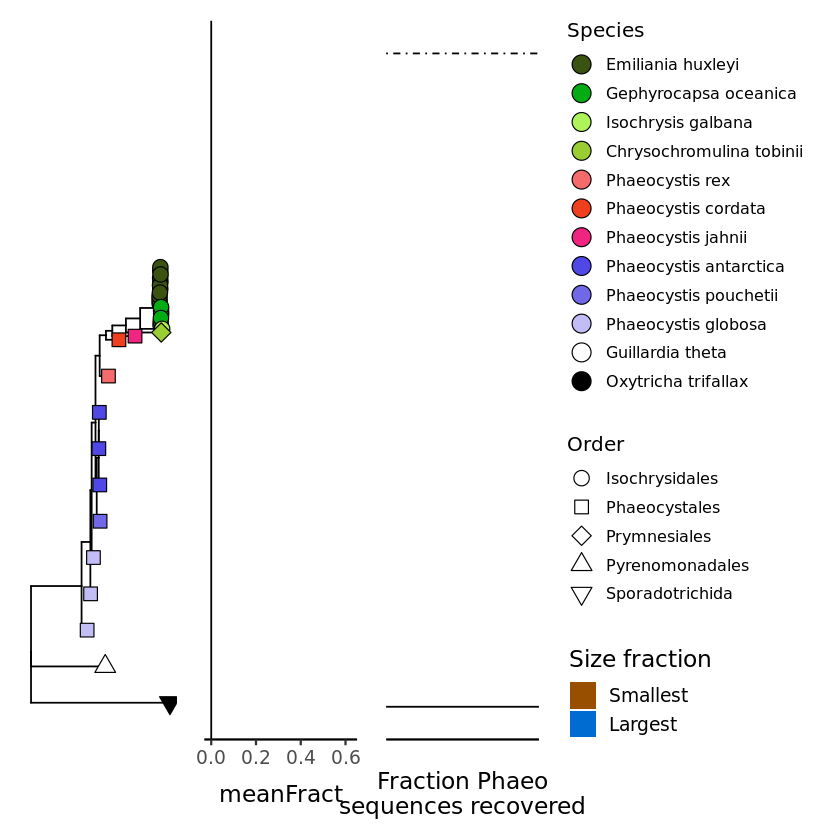

In [165]:
abund_vals = ggplot(as.phylo(ggtree(root(read.tree("/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/code/jupyter-notebooks/extracted-phaeo/2022-11-25_2/trees/fasttree.nwk"),
                               outgroup="Oxytri1"),
                               layout="circular")) %>% as_tibble() %>% 
    dplyr::left_join(ggplot_build(scaleClade(p, node=54, scale=.1))$data[[1]]) %>%
    dplyr::left_join(input_tree_dict%>%
                     dplyr::mutate(Labels=case_when(Source_ID=="P_pouchetii_CCB" ~ "busco_rmdup_PhaeoCCB-phaeo",
                                                                      TRUE ~ Labels),
                                  Source_ID=case_when(Labels=="Phaglo1" ~ "P_globosa_jgi",
                                                      Labels=="Phaant1" ~ "P_ant_jgi",
                                                                      TRUE ~ Source_ID)) %>%
                                                     dplyr::left_join(filter_phaeo_data%>% 
                                                                      dplyr::filter((Genus=="Phaeocystis") &
                                                                                    (grepl("SO",TaraSample)))%>%
                                                        dplyr::select(TaraSample,PhaeoDB,
                                                                     TotalBySamp,Fraction,
                                                                     Basin,SizeFract,
                                                                     PercDiff),
                                                        by=c("Source_ID"="PhaeoDB")),
                     by=c("label"="Labels"))  %>% dplyr::filter(!is.na(Basin)) %>%
    dplyr::distinct() %>%
    dplyr::filter(grepl("SRF",TaraSample)|grepl("DCM",TaraSample)|grepl("MIX",TaraSample)) %>%
    dplyr::group_by(y, SizeFract) %>%
    dplyr::summarize(meanFract=mean(Fraction),sdFract=sd(Fraction))) + 
    theme_bw(base_size=14) + 
    geom_bar(aes(x = y, y = meanFract, fill = SizeFract, group = paste0(y, SizeFract)),
            stat="identity",position=position_dodge(width = 0.5),width=0.5)+
    geom_errorbar(aes(x = y, ymax = meanFract+sdFract, ymin = meanFract-sdFract, 
                      group = paste0(y, SizeFract)),
                  position=position_dodge(width=0.5),width=0.3)+ xlim(c(2,20)) + coord_flip() + 
    scale_shape_manual(values=c(21,22)) + 
    theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+xlim(c(2,20))+xlab("Fraction Phaeo\nsequences recovered") + 
    scale_fill_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction")+ 
    scale_color_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction") +
    geom_hline(aes(yintercept=0))

total_db_plot = ggplot(filter_phaeo_data %>% dplyr::filter((PhaeoDB %in% c("phaeo_all","colonies_phaeo",
                                                   "free_phaeo")) & (Genus=="Phaeocystis") & (Basin=="SO")) %>%
          dplyr::mutate(PhaeoDBCoord = case_when(PhaeoDB == "free_phaeo" ~ 12,
                                                 PhaeoDB == "colonies_phaeo" ~ 7.5,
                                                 PhaeoDB == "phaeo_all" ~ 3)) %>%
           dplyr::group_by(PhaeoDBCoord,SizeFract,PhaeoDB) %>%
          dplyr::summarize(meanFract = mean(Fraction),sdFract = sd(Fraction))) + 
    geom_density_ridges(aes(y = PhaeoDBCoord, x = meanFract, fill = SizeFract, 
                            group = paste0(PhaeoDB, SizeFract)))+
    theme_bw(base_size=14) + 
    theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
    xlab("Fraction Phaeo\nsequences recovered") + 
    scale_fill_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction")+ 
    scale_color_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction")+
    geom_hline(aes(yintercept=0.5),linetype="dotdash")+
    geom_hline(aes(yintercept=0),linetype="solid")
    

((scaled_tree+theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.x=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "transparent"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+ylim(c(2,20)))|abund_vals|total_db_plot)+ 
        plot_layout(guides="collect",widths=c(1,1,1))

ggsave("phaeo_tree_w_data.pdf",width=8,height=10,units="in")

In [30]:
filter_phaeo_data %>% dplyr::filter((PhaeoDB %in% c("phaeo_all","colonies_phaeo",
                                                   "free_phaeo")) & (Genus=="Phaeocystis") & (Basin=="SO")) %>%
          dplyr::mutate(PhaeoDBCoord = case_when(PhaeoDB == "free_phaeo" ~ 7,
                                                 PhaeoDB == "colonies_phaeo" ~ 12.5,
                                                 PhaeoDB == "phaeo_all" ~ 3)) %>%
           dplyr::group_by(PhaeoDBCoord,SizeFract,PhaeoDB) %>%
          dplyr::summarize(meanFract = mean(Fraction),sdFract = sd(Fraction))

`summarise()` has grouped
output by 'PhaeoDBCoord',
'SizeFract'. You can
override using the
`.groups` argument.


PhaeoDBCoord,SizeFract,PhaeoDB,meanFract,sdFract
<dbl>,<chr>,<chr>,<dbl>,<dbl>
3.0,Largest,phaeo_all,0.94029480,0.0017584646
3.0,Small,phaeo_all,0.94192773,0.0217185737
7.0,Largest,free_phaeo,0.08475132,0.0008788514
7.0,Small,free_phaeo,0.13721744,0.0399552626
12.5,Largest,colonies_phaeo,0.79354061,0.0006964702
12.5,Small,colonies_phaeo,0.75650909,0.0371909789


In [176]:
abund_vals_ms = ggplot(as.phylo(ggtree(root(read.tree("/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/code/jupyter-notebooks/extracted-phaeo/2022-11-25_2/trees/fasttree.nwk"),
                               outgroup="Oxytri1"),
                               layout="circular")) %>% as_tibble() %>% 
    dplyr::left_join(ggplot_build(scaleClade(p, node=54, scale=.1))$data[[1]]) %>%
    dplyr::left_join(input_tree_dict%>%
                     dplyr::mutate(Labels=case_when(Source_ID=="P_pouchetii_CCB" ~ "busco_rmdup_PhaeoCCB-phaeo",
                                                                      TRUE ~ Labels),
                                  Source_ID=case_when(Labels=="Phaglo1" ~ "P_globosa_jgi",
                                                      Labels=="Phaant1" ~ "P_ant_jgi",
                                                                      TRUE ~ Source_ID)) %>%
                                                     dplyr::left_join(filter_phaeo_data%>% 
                                                                      dplyr::filter((Genus=="Phaeocystis") &
                                                                                    (grepl("MS",TaraSample)))%>%
                                                        dplyr::select(TaraSample,PhaeoDB,
                                                                     TotalBySamp,Fraction,
                                                                     Basin,SizeFract,
                                                                     PercDiff),
                                                        by=c("Source_ID"="PhaeoDB")),
                     by=c("label"="Labels"))  %>% dplyr::filter(!is.na(Basin)) %>%
    dplyr::distinct() %>%
    dplyr::filter(grepl("SRF",TaraSample)|grepl("DCM",TaraSample)|grepl("MIX",TaraSample)) %>%
    dplyr::group_by(y, SizeFract) %>%
    dplyr::summarize(meanFract=mean(Fraction),sdFract=sd(Fraction))) + 
    theme_bw(base_size=14) + 
    geom_bar(aes(x = y, y = meanFract, fill = SizeFract, group = paste0(y, SizeFract)),
            stat="identity",position=position_dodge(width = 0.5),width=0.5)+
    geom_errorbar(aes(x = y, ymax = meanFract+sdFract, ymin = meanFract-sdFract, 
                      group = paste0(y, SizeFract)),
                  position=position_dodge(width=0.5),width=0.3)+ xlim(c(2,20)) + coord_flip()+ 
    scale_shape_manual(values=c(21,22)) + 
    theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+xlim(c(2,20))+xlab("Fraction Phaeo\nsequences recovered") + 
    scale_fill_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction")+ 
    scale_color_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction") +
    geom_hline(aes(yintercept=0))

total_db_plot_ms = ggplot(filter_phaeo_data %>% dplyr::filter((PhaeoDB %in% c("phaeo_all","colonies_phaeo",
                                                   "free_phaeo")) & (Genus=="Phaeocystis") & (Basin=="MS")) %>%
          dplyr::mutate(PhaeoDBCoord = case_when(PhaeoDB == "free_phaeo" ~ 12,
                                                 PhaeoDB == "colonies_phaeo" ~ 7.5,
                                                 PhaeoDB == "phaeo_all" ~ 3)) %>% #3)) %>%
           dplyr::group_by(PhaeoDBCoord,SizeFract,PhaeoDB) %>%
          dplyr::summarize(meanFract = mean(Fraction),sdFract = sd(Fraction))) + 
    geom_bar(aes(x = PhaeoDBCoord, y = meanFract, fill = SizeFract, group = paste0(PhaeoDB, SizeFract)),
            stat="identity",position=position_dodge(width = 1),width=1)+
    geom_errorbar(aes(x = PhaeoDBCoord, ymax = meanFract+sdFract, ymin = meanFract-sdFract, 
                      group = paste0(PhaeoDB, SizeFract)),
                  position=position_dodge(width=1),width=0.3)+ xlim(c(2,15)) + coord_flip()+ 
    theme_bw(base_size=14) + 
    theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
    xlab("Fraction Phaeo\nsequences recovered") + 
    scale_fill_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction")+ 
    scale_color_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction")+
    geom_hline(aes(yintercept=0.5),linetype="dotdash")+
    geom_hline(aes(yintercept=0),linetype="solid")

Joining, by = c("parent",
"node")
`summarise()` has grouped
output by 'y'. You can
override using the
`.groups` argument.
Scale for x is already
present.
Adding another scale for
x, which will replace the
existing scale.
`summarise()` has grouped
output by 'PhaeoDBCoord',
'SizeFract'. You can
override using the
`.groups` argument.


`summarise()` has grouped
output by 'PhaeoDBCoord',
'SizeFract'. You can
override using the
`.groups` argument.
Scale for y is already
present.
Adding another scale for
y, which will replace the
existing scale.


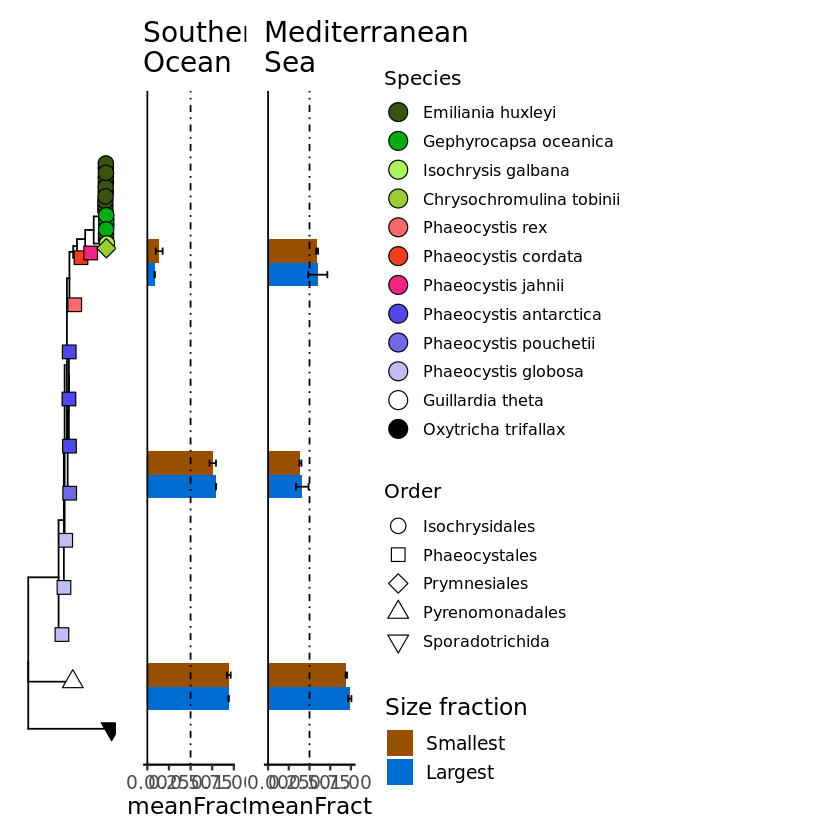

In [178]:
total_db_plot = ggplot(filter_phaeo_data %>% dplyr::filter((PhaeoDB %in% c("phaeo_all","colonies_phaeo",
                                                   "free_phaeo")) & (Genus=="Phaeocystis") & (Basin=="SO")) %>%
          dplyr::mutate(PhaeoDBCoord = case_when(PhaeoDB == "free_phaeo" ~ 7,
                                                 PhaeoDB == "colonies_phaeo" ~ 12.5,
                                                 PhaeoDB == "phaeo_all" ~ 3)) %>%
           dplyr::mutate(PhaeoDBCoord = case_when(PhaeoDB == "free_phaeo" ~ 12,#7,
                                                 PhaeoDB == "colonies_phaeo" ~ 7.5,#12.5,
                                                 PhaeoDB == "phaeo_all" ~ 3)) %>% #3)) %>%
           dplyr::group_by(PhaeoDBCoord,SizeFract,PhaeoDB) %>%
          dplyr::summarize(meanFract = mean(Fraction),sdFract = sd(Fraction))) + 
    geom_bar(aes(x = PhaeoDBCoord, y = meanFract, fill = SizeFract, group = paste0(PhaeoDB, SizeFract)),
            stat="identity",position=position_dodge(width = 1),width=1)+
    geom_errorbar(aes(x = PhaeoDBCoord, ymax = meanFract+sdFract, ymin = meanFract-sdFract, 
                      group = paste0(PhaeoDB, SizeFract)),
                  position=position_dodge(width=1),width=0.3)+ xlim(c(2,15)) + coord_flip()+ 
    theme_bw(base_size=14) + 
    theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
    xlab("Fraction Phaeo\nsequences recovered") + 
    scale_fill_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction")+ 
    scale_color_manual(breaks=c("Small","Largest"),labels=c("Smallest","Largest"),
                      values=c("#994F00","#006CD1"),name="Size fraction")+
    geom_hline(aes(yintercept=0.5),linetype="dotdash")+
    geom_hline(aes(yintercept=0),linetype="solid")
    

((scaled_tree+theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.x=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "transparent"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+ylim(c(2,15)))|total_db_plot+ggtitle("Southern\nOcean")|
             total_db_plot_ms+ggtitle("Mediterranean\nSea"))+ 
        plot_layout(guides="collect",widths=c(1,1,1,1,1))
#abund_vals|abund_vals_ms|

ggsave("phaeo_tree_w_data_MS.pdf",width=10,height=10,units="in")

In [4]:
base_path="/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/output/ehux-aik-orthofinder-output/orthofinder_phaeo_for_tree2/Results_Dec01"

In [5]:
## read in Phaeo orthologous group clustering to look at species differences

In [6]:
base_path="/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/output/ehux-aik-orthofinder-output/orthofinder_phaeo_for_tree2/Results_Dec01"
orthogroups_file=data.frame(fread(file.path(base_path,"Orthogroups","Orthogroups.tsv"),sep="\t"))
not_empty = orthogroups_file %>% 
    dplyr::select(-X3492.aik.aa,-X914.aik.aa) %>%
    filter_at(vars(P_ant_jgi.phaeo.aa, P_antarctica_caron.phaeo.aa, P_antarctica_ccmp1374.phaeo.aa,
                          P_cordata_ccmp3104.phaeo.aa, P_globosa_ccmp1528.phaeo.aa, P_globosa_jgi.phaeo.aa,
                          P_jahnii_ccmp2496.phaeo.aa, P_rex_ccmp2000.phaeo.aa,
                          P_sp_ccmp2710.phaeo.aa,
                          #Chrsp.genome.aa,  
                          #Oxytri1.genome.aa, 
                          #Guith1.genome.aa,
                          Phaant1.genome.aa, Phaglo1.genome.aa, rmdup_PhaeoCCB.phaeo.aa, rmdup_PhaeoCCB.aa),
               all_vars(. != ""))

is_phaeo <- function(input_verb) {
    print(grepl("P_",input_verb)|grepl("Ph",input_verb))
    return(grepl("P_",input_verb)|grepl("Ph",input_verb))
}
not_empt=not_empty%>% #dplyr::select(-Orthogroup)%>%
    dplyr::filter_at(vars(P_ant_jgi.phaeo.aa, P_antarctica_caron.phaeo.aa, P_antarctica_ccmp1374.phaeo.aa,
                          P_cordata_ccmp3104.phaeo.aa, P_globosa_ccmp1528.phaeo.aa, P_globosa_jgi.phaeo.aa,
                          P_jahnii_ccmp2496.phaeo.aa, P_rex_ccmp2000.phaeo.aa,
                          P_sp_ccmp2710.phaeo.aa,
                          Phaant1.genome.aa, Phaglo1.genome.aa, rmdup_PhaeoCCB.phaeo.aa, rmdup_PhaeoCCB.aa),
                     all_vars(!grepl(",",.)))

seqs_to_extract = orthogroups_file %>% 
    dplyr::select(-X3492.aik.aa,-X914.aik.aa) %>%
    tidyr::pivot_longer(cols=!starts_with("Orthogroup"),names_to="Reference",
                        values_to="Gene") %>%
    dplyr::filter(Orthogroup %in% not_empt$Orthogroup) %>%
    tidyr::separate_rows(Gene,sep=",")

list_set <- function(input_list) {
    return(list(unique(trimws(input_list))))
}

orthogroups_file_for_upset = orthogroups_file %>% 
    dplyr::select(-X3492.aik.aa,-X914.aik.aa) %>%
    tidyr::pivot_longer(cols=!starts_with("Orthogroup"),names_to="Reference",
                        values_to="Gene") %>%
    dplyr::mutate(ToBeGrouped=case_when((is.na(Gene))|(Gene=="")~"",
                                        TRUE~Reference)) %>%
    dplyr::filter(ToBeGrouped!="") %>%
    dplyr::group_by(Orthogroup) %>% dplyr::summarize(FinalList=list_set(ToBeGrouped))

list_of_names = unique((orthogroups_file %>% 
    dplyr::select(-X3492.aik.aa,-X914.aik.aa) %>%
    tidyr::pivot_longer(cols=!starts_with("Orthogroup"),names_to="Reference",
                        values_to="Gene"))$Reference)

tax_tab = read.csv("mmetsp-tax.txt") %>%
        dplyr::bind_rows(data.frame("Labels"=c("Phaant1","Phaglo1","Oxytri1",
                                               "Chrsp","Guith1","rmdup_PhaeoCCB"),
                                    "Domain"=c("Eukaryota","Eukaryota","Eukaryota",
                                              "Eukaryota","Eukaryota","Eukaryota"),
                                    "Phylum"=c("Haptophyta","Haptophyta","Ciliophora",
                                              "Haptophyta","Cryptophyta","Haptophyta"),
                                    "Class"=c("Prymnesiophyceae","Prymnesiophyceae","Spirotrichea",
                                              "Eukaryota","Cryptophyceae","Prymnesiophyceae"),
                                    "Order"=c("Phaeocystales","Phaeocystales","Sporadotrichida",
                                              "Prymnesiales","Pyrenomonadales","Phaeocystales"),
                                    "Family"=c("Phaeocystaceae","Phaeocystaceae","Oxytrichidae",
                                              "Chrysochromulinaceae","Geminigeraceae","Phaeocystaceae"),
                                    "Genus"=c("Phaeocystis","Phaeocystis","Oxytricha",
                                              "Chrysochromulina","Guillardia","Phaeocystis"),
                                    "Species"=c("Phaeocystis antarctica",
                                                "Phaeocystis globosa",
                                                "Oxytricha trifallax",
                                              "Chrysochromulina tobinii","Guillardia theta",
                                                "Phaeocystis pouchetii"))) %>%
        dplyr::bind_rows(read.csv("phaeo-taxonomy-table.txt",sep="\t"))%>%
    dplyr::mutate(Species = case_when(Species=="huxleyi" ~ "Emiliania huxleyi",
                                      Species=="galbana" ~ "Isochrysis galbana",
                                      Species=="oceanica" ~ "Gephyrocapsa oceanica",
                                      Species=="Phaeocystis sp." ~ "Phaeocystis globosa",
                                      TRUE ~ Species)) %>%
    dplyr::mutate(Source_ID=case_when(is.na(Source_ID)~Labels,
                                     TRUE ~ Source_ID))

real_names = data.frame("FileName" = c('Chrsp.genome.aa','Guith1.genome.aa','MMETSP0595.mmetsp.aa',
                                       'MMETSP0943.mmetsp.aa','MMETSP0994.mmetsp.aa','MMETSP0995.mmetsp.aa',
                                       'MMETSP0996.mmetsp.aa','MMETSP0997.mmetsp.aa','MMETSP1006.mmetsp.aa',
                                       'MMETSP1007.mmetsp.aa','MMETSP1008.mmetsp.aa','MMETSP1009.mmetsp.aa',
                                       'MMETSP1150.mmetsp.aa','MMETSP1151.mmetsp.aa','MMETSP1152.mmetsp.aa',
                                       'MMETSP1153.mmetsp.aa','MMETSP1154.mmetsp.aa','MMETSP1156.mmetsp.aa',
                                       'MMETSP1157.mmetsp.aa','MMETSP1363.mmetsp.aa','MMETSP1364.mmetsp.aa',
                                       'MMETSP1365.mmetsp.aa','MMETSP1366.mmetsp.aa','Oxytri1.genome.aa',
                                       'P_ant_jgi.phaeo.aa','P_antarctica_caron.phaeo.aa',
                                       'P_antarctica_ccmp1374.phaeo.aa','P_cordata_ccmp3104.phaeo.aa',
                                       'P_globosa_ccmp1528.phaeo.aa','P_globosa_jgi.phaeo.aa',
                                       'P_jahnii_ccmp2496.phaeo.aa','P_pouchetii_CCB.phaeo.aa',
                                       'P_rex_ccmp2000.phaeo.aa','P_sp_ccmp2710.phaeo.aa',
                                       'Phaant1.genome.aa','Phaglo1.genome.aa','rmdup_PhaeoCCB.phaeo.aa',
                                       'rmdup_PhaeoCCB.aa')) %>%
    dplyr::mutate(File_Name=FileName) %>%
    tidyr::separate(FileName,sep="\\.",into=c("ShortCode","extras")) %>%
    dplyr::left_join(tax_tab,by=c("ShortCode"="Source_ID")) %>%
    dplyr::mutate(Grouping=case_when(Species%in%c("Phaeocystis antarctica",
                                                  "Phaeocystis globosa",
                                                  "Phaeocystis pouchetii")~"Colony-former",
                                     Species %in% c("Phaeocystis jahnii",
                                                    "Phaeocystis rex",
                                                    "Phaeocystis cordata") ~ "Free-living",
                                     TRUE ~ "Outgroup"))

list_set <- function(input_list) {
    return(list(unique(trimws(input_list))))
}

orthogroups_file_for_upset_named = orthogroups_file %>% 
    dplyr::select(-X3492.aik.aa,-X914.aik.aa) %>%
    tidyr::pivot_longer(cols=!starts_with("Orthogroup"),names_to="Reference",
                        values_to="Gene") %>%
    dplyr::left_join(real_names,by=c("Reference"="File_Name")) %>%
    dplyr::mutate(ToBeGrouped=case_when((is.na(Gene))|(Gene=="")~"",
                                        TRUE~ShortCode)) %>%
    dplyr::filter(ToBeGrouped!="") %>%
    dplyr::mutate(ToBeGrouped=trimws(ToBeGrouped))%>%
    dplyr::group_by(Orthogroup) %>% dplyr::summarize(FinalList=list_set(ToBeGrouped),
                                                     Grouping=list_set(Grouping))

head_up=orthogroups_file %>% 
    dplyr::select(-X3492.aik.aa,-X914.aik.aa) %>%
    tidyr::pivot_longer(cols=!starts_with("Orthogroup"),names_to="Reference",
                        values_to="Gene")

pasted_col=orthogroups_file_for_upset_named %>%
    dplyr::mutate(grp=lapply(Grouping,paste0,collapse="|"))

unnested_og=orthogroups_file_for_upset_named %>% 
    mutate(colonies = map(Grouping, str_detect, pattern = "Colony-former"),
           colonies = map_lgl(colonies, any))


Warning message:
“Expected 2 pieces. Additional pieces discarded in 37 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [7]:
OG_df = orthogroups_file %>% 
    dplyr::select(-X3492.aik.aa,-X914.aik.aa) %>%
    tidyr::pivot_longer(cols=!starts_with("Orthogroup"),names_to="Reference",
                        values_to="Gene") %>%
    dplyr::left_join(real_names,by=c("Reference"="File_Name")) %>%
    dplyr::mutate(ToBeGrouped=case_when((is.na(Gene))|(Gene=="")~"",
                                        TRUE~ShortCode)) %>%
    dplyr::filter(ToBeGrouped!="")

final_df = data.frame()
for (curr_pairing_1 in unique(OG_df$ToBeGrouped)) {
    for (curr_pairing_2 in unique(OG_df$ToBeGrouped)) { 
        groupings=real_names %>% dplyr::filter(ShortCode %in% c(curr_pairing_1,curr_pairing_2))
        Summarized_Grouping="Mixed"
        if (length(unique(groupings$Grouping))==1) {
            if (unique(groupings$Grouping)=="Colony-former") {
                Summarized_Grouping="Colony-formers"
            } else if (unique(groupings$Grouping)=="Free-living") {
                Summarized_Grouping="Free-livers"
            }
        }
        curr_df = data.frame("NumberOGs"=orthogroups_file_for_upset_named %>% 
                             dplyr::filter(grepl(curr_pairing_1,FinalList)&
                                           grepl(curr_pairing_2,FinalList)) %>% dplyr::tally(),
                             "Member1"=curr_pairing_1,"Member2"=curr_pairing_2,
                             "Grouping"=Summarized_Grouping)
        final_df=final_df%>%dplyr::bind_rows(curr_df)
    }
}

In [136]:
final_df = data.frame()
for (curr_pairing_1 in unique(OG_df$ToBeGrouped)) {
    for (curr_pairing_2 in unique(OG_df$ToBeGrouped)) { 
        #if (nrow(final_df) > 0) {
        #    if (nrow(final_df%>%dplyr::filter((Member1==curr_pairing_2)&(Member2==curr_pairing_1))) > 0) {
        #        next
        #    }
        #}
        groupings=real_names %>% dplyr::filter(ShortCode %in% c(curr_pairing_1,curr_pairing_2))
        Summarized_Grouping="Mixed"
        if (length(unique(groupings$Grouping))==1) {
            if (unique(groupings$Grouping)=="Colony-former") {
                Summarized_Grouping="Colony-formers"
            } else if (unique(groupings$Grouping)=="Free-living") {
                Summarized_Grouping="Free-livers"
            }
        }
        curr_df = data.frame("NumberOGs"=orthogroups_file_for_upset_named %>% 
                             dplyr::filter(grepl(curr_pairing_1,FinalList)&
                                           grepl(curr_pairing_2,FinalList)) %>% dplyr::tally(),
                             "Member1"=curr_pairing_1,"Member2"=curr_pairing_2,
                             "Grouping"=Summarized_Grouping)
        final_df=final_df%>%dplyr::bind_rows(curr_df)
    }
}

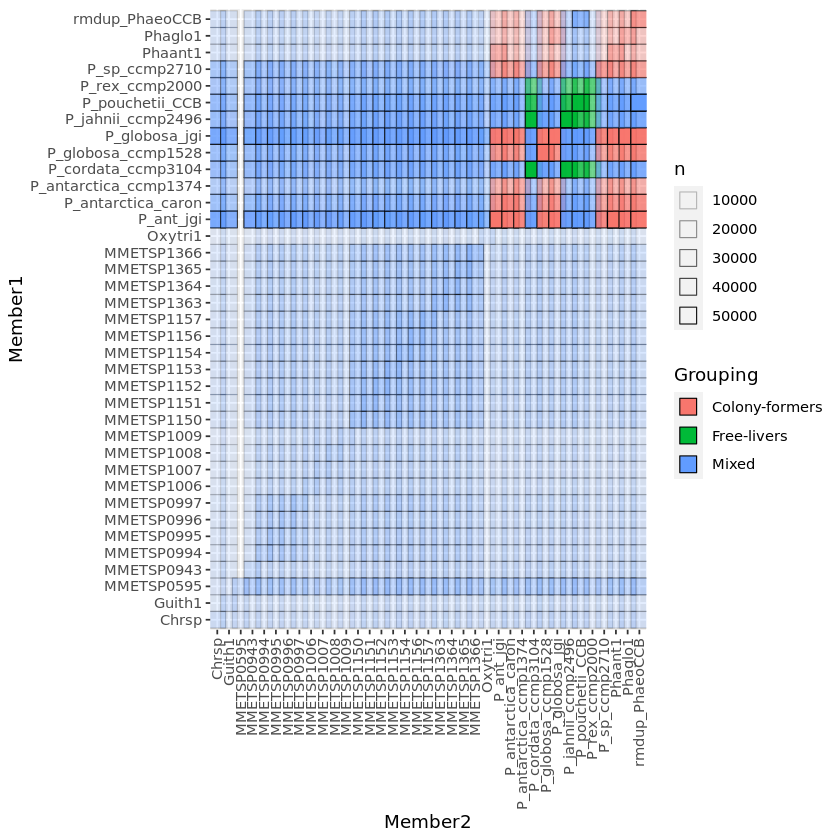

In [137]:
ggplot(final_df %>% 
       dplyr::mutate(Member1_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member2,
                                            TRUE ~ Member1),
                     Member2_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member1,
                                            TRUE ~ Member2)) %>%
       dplyr::mutate(Member1=Member1_temp,Member2=Member2_temp) %>%
       dplyr::left_join(phaeo_coords,by=c("Member1"="Source_ID"))) + 
    geom_point(aes(y = Member1, x = Member2, fill=Grouping, alpha=n),pch=22,size=5)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

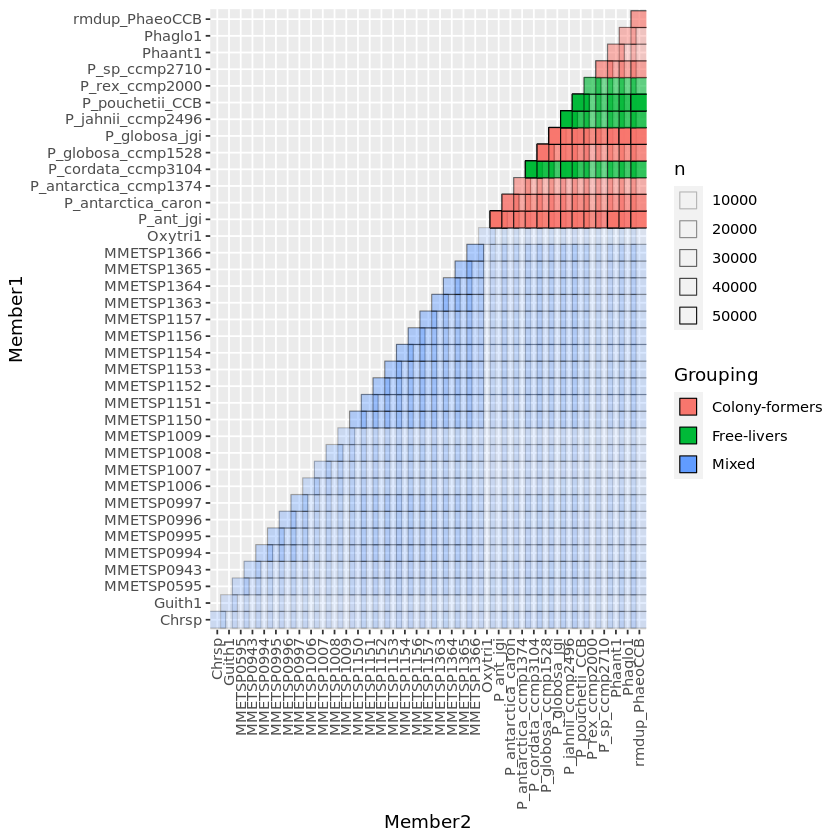

In [130]:
ggplot(final_df %>% 
       dplyr::mutate(Member1_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member2,
                                            TRUE ~ Member1),
                     Member2_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member1,
                                            TRUE ~ Member2)) %>%
       dplyr::mutate(Member1=Member1_temp,Member2=Member2_temp) %>%
       dplyr::left_join(phaeo_coords,by=c("Member1"="Source_ID"))) + 
    geom_point(aes(y = Member1, x = Member2, fill=Grouping, alpha=n),pch=22,size=5)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [ ]:
phaeo_coords = as.phylo(ggtree(root(read.tree("/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/code/jupyter-notebooks/extracted-phaeo/2022-11-25_2/trees/fasttree.nwk"),
                               outgroup="Oxytri1"),
                               layout="circular")) %>% as_tibble() %>% 
    dplyr::left_join(ggplot_build(scaleClade(p, node=54, scale=.1))$data[[1]]) %>%
    dplyr::left_join(input_tree_dict%>%
                     dplyr::mutate(Labels=case_when(Source_ID=="P_pouchetii_CCB" ~ "busco_rmdup_PhaeoCCB-phaeo",
                                                                      TRUE ~ Labels),
                                  Source_ID=case_when(Labels=="Phaglo1" ~ "P_globosa_jgi",
                                                      Labels=="Phaant1" ~ "P_ant_jgi",
                                                                      TRUE ~ Source_ID)) %>%
                                                     dplyr::left_join(filter_phaeo_data%>% 
                                                                      dplyr::filter((Genus=="Phaeocystis") &
                                                                                    (grepl("MS",TaraSample)))%>%
                                                        dplyr::select(TaraSample,PhaeoDB,
                                                                     TotalBySamp,Fraction,
                                                                     Basin,SizeFract,
                                                                     PercDiff),
                                                        by=c("Source_ID"="PhaeoDB")),
                     by=c("label"="Labels"))
factor_member2 = unique((phaeo_coords %>% arrange(desc(y)))$Source_ID)
factor_member2=scaled_tree$data
heatmap_plt=ggplot(final_df %>% 
       dplyr::mutate(Member1_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member2,
                                            TRUE ~ Member1),
                     Member2_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member1,
                                            TRUE ~ Member2)) %>%
       dplyr::mutate(Member1=Member1_temp,Member2=Member2_temp) %>% 
       dplyr::left_join(phaeo_coords,by=c("Member2"="Source_ID")) %>% 
       dplyr::filter(grepl("P_",Member2)) %>% dplyr::mutate(Member2=factor(Member2,levels=factor_member2))%>% 
       dplyr::mutate(Member1=factor(Member1,levels=factor_member2)) %>% dplyr::filter(!is.na(Member1)) %>%
       dplyr::mutate(Grouping = case_when((Member1=="P_pouchetii_CCB")&(grep("_ant",Member2))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")&(grep("_ant",Member2))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")|(Member2=="P_pouchetii_CCB")~"Mixed",
                                          TRUE ~ Grouping))) + 
    geom_point(aes(y = y, x = Member1, fill=Grouping, alpha=n,size=n),pch=21) + theme_bw(base_size=16) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    scale_fill_manual(breaks=c("Colony-formers","Free-livers","Outsiders","Mixed"),
                      values=c("#c2bdf5","#fabfb7","gray","black"),
                      name="Cluster\ncategory") +
    scale_size(range=c(5,15)) +ylim(c(2,15))+
      theme(axis.text.y=element_blank(),
            axis.ticks.y=element_blank(),
            axis.title.y=element_blank(),
            axis.line.y = element_line(colour = "transparent"),
            axis.line.x = element_line(colour = "black"),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.border = element_blank(),
            panel.background = element_blank())
heatmap_plt

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 23 rows [6, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 26 rows [1, 2, 3, 4, 5, 7, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, ...].”


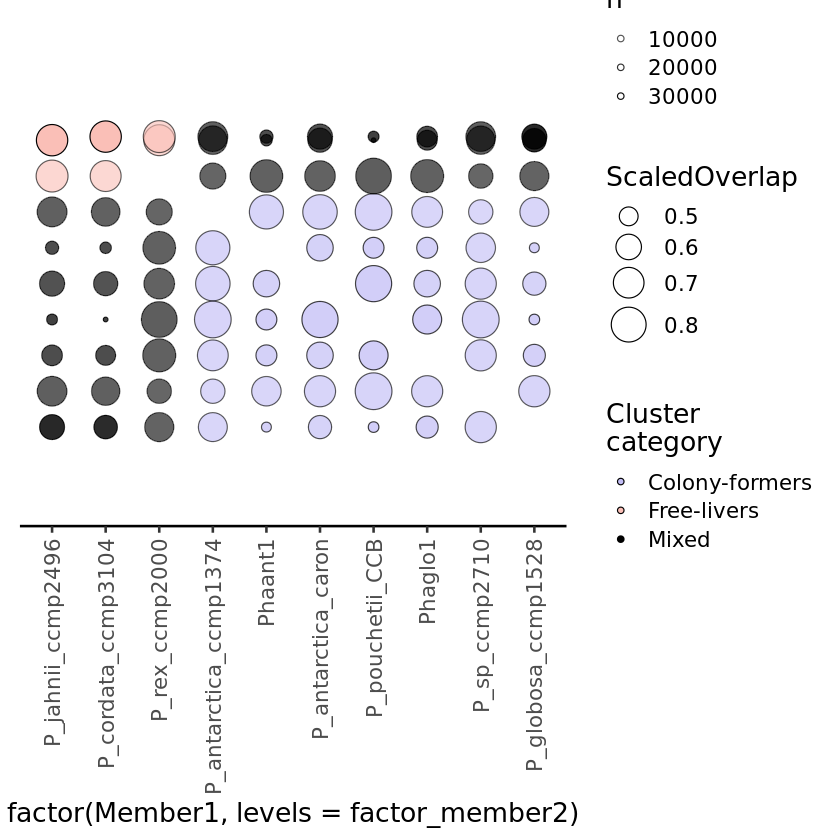

In [199]:
tree_data=scaled_tree$data %>% tidyr::separate(label,sep="-phaeo",into=c("label","extra1"))%>% 
    tidyr::separate(label,sep="-genome",into=c("label","extra2")) %>%
    dplyr::filter((label!="Chrsp") & (label!="Oxytri1") & (label!="Guith1"))#%>% 
    #tidyr::separate(label,sep="-mmetsp",into=c("label","extra3"))

## tomorrow: need to refactor these labels so x-axis is correct!!
factor_member2=unique((tree_data %>% dplyr::arrange(desc(y)))$label)

heatmap_plt=ggplot(final_df %>% 
       dplyr::mutate(Member1_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member2,
                                            TRUE ~ Member1),
                     Member2_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member1,
                                            TRUE ~ Member2)) %>%
       dplyr::mutate(Member1=Member1_temp,Member2=Member2_temp) %>% 
       dplyr::left_join(tree_data,by=c("Member2"="label")) %>% 
       dplyr::filter(grepl("P_",Member2)|grepl("Pha",Member2)) %>% 
                   dplyr::mutate(Member2=factor(Member2,levels=factor_member2))%>% 
       dplyr::mutate(Member1=factor(Member1,levels=factor_member2)) %>% dplyr::filter(!is.na(Member1)) %>%
       dplyr::mutate(Grouping = case_when((Member1=="P_pouchetii_CCB")&(grepl("ant",Member2))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")&(grepl("glo",Member2))~"Colony-formers",
                                          (Member2=="P_pouchetii_CCB")&(grepl("ant",Member1))~"Colony-formers",
                                          (Member2=="P_pouchetii_CCB")&(grepl("glo",Member1))~"Colony-formers",
                                          (Member2=="P_pouchetii_CCB")&(grepl("P_sp",Member1))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")&(grepl("P_sp",Member2))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")&(grepl("P_pouchetii_CCB",Member2))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")|(Member2=="P_pouchetii_CCB")~"Mixed",
                                          TRUE ~ Grouping)) %>%
        dplyr::left_join(final_df %>% dplyr::filter(Member1==Member2) %>% dplyr::arrange(desc(n)) %>%
    dplyr::rename(c("SelfMatches1"="n","Member"="Member1")) %>%
    dplyr::select(SelfMatches1,Member),by=c("Member1"="Member"))%>%
        dplyr::left_join(final_df %>% dplyr::filter(Member1==Member2) %>% dplyr::arrange(desc(n)) %>%
    dplyr::rename(c("SelfMatches2"="n","Member"="Member2")) %>%
    dplyr::select(SelfMatches2,Member),by=c("Member2"="Member")) %>%
                  rowwise() %>%
                  dplyr::mutate(MeanMatches1and2=min(SelfMatches1,SelfMatches2))%>%
                  dplyr::mutate(ScaledOverlap=n/MeanMatches1and2) %>%
                  dplyr::filter(Member1!=Member2)) + 
    geom_point(aes(y = y, x = factor(Member1,levels=factor_member2), 
                   fill=Grouping, alpha=n, size=ScaledOverlap),pch=21) + 
    scale_alpha_continuous(range=c(0.6,1))+
    theme_bw(base_size=16) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    scale_fill_manual(breaks=c("Colony-formers","Free-livers","Outsiders","Mixed"),
                      values=c("#c2bdf5","#fabfb7","gray","black"),
                      name="Cluster\ncategory") +
    scale_size(range=c(1,10)) +ylim(c(2,15))+
      theme(axis.text.y=element_blank(),
            axis.ticks.y=element_blank(),
            axis.title.y=element_blank(),
            axis.line.y = element_line(colour = "transparent"),
            axis.line.x = element_line(colour = "black"),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.border = element_blank(),
            panel.background = element_blank())
heatmap_plt

In [ ]:
final_df %>% 
       dplyr::mutate(Member1_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member2,
                                            TRUE ~ Member1),
                     Member2_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member1,
                                            TRUE ~ Member2)) %>%
       dplyr::mutate(Member1=Member1_temp,Member2=Member2_temp) %>% 
       dplyr::left_join(tree_data,by=c("Member2"="label")) %>% 
       dplyr::filter(grepl("P_",Member2)|grepl("Pha",Member2)) %>% 
                   dplyr::mutate(Member2=factor(Member2,levels=factor_member2))%>% 
       dplyr::mutate(Member1=factor(Member1,levels=factor_member2)) %>% dplyr::filter(!is.na(Member1)) %>%
       dplyr::mutate(Grouping = case_when((Member1=="P_pouchetii_CCB")&(grepl("ant",Member2))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")&(grepl("glo",Member2))~"Colony-formers",
                                          (Member2=="P_pouchetii_CCB")&(grepl("ant",Member1))~"Colony-formers",
                                          (Member2=="P_pouchetii_CCB")&(grepl("glo",Member1))~"Colony-formers",
                                          (Member2=="P_pouchetii_CCB")&(grepl("P_sp",Member1))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")&(grepl("P_sp",Member2))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")&(grepl("P_pouchetii_CCB",Member2))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")|(Member2=="P_pouchetii_CCB")~"Mixed",
                                          TRUE ~ Grouping)) %>%
        dplyr::left_join(final_df %>% dplyr::filter(Member1==Member2) %>% dplyr::arrange(desc(n)) %>%
    dplyr::rename(c("SelfMatches1"="n","Member"="Member1")) %>%
    dplyr::select(SelfMatches1,Member),by=c("Member1"="Member"))%>%
        dplyr::left_join(final_df %>% dplyr::filter(Member1==Member2) %>% dplyr::arrange(desc(n)) %>%
    dplyr::rename(c("SelfMatches2"="n","Member"="Member2")) %>%
    dplyr::select(SelfMatches2,Member),by=c("Member2"="Member")) %>%
    rowwise() %>%
                  dplyr::mutate(MeanMatches1and2=min(SelfMatches1,SelfMatches2))

In [141]:
final_df %>% 
       dplyr::mutate(Member1_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member2,
                                            TRUE ~ Member1),
                     Member2_temp=case_when((Member2=="MMETSP0595")&
                                            (Member1!="Chrsp")&
                                            (Member1!="Guith1")~Member1,
                                            TRUE ~ Member2)) %>%
       dplyr::mutate(Member1=Member1_temp,Member2=Member2_temp) %>% 
       dplyr::left_join(tree_data,by=c("Member2"="label")) %>% 
       dplyr::filter(grepl("P_",Member2)|grepl("Pha",Member2)) %>% dplyr::mutate(Member2=factor(Member2,levels=factor_member2))%>% 
       dplyr::mutate(Member1=factor(Member1,levels=factor_member2)) %>% dplyr::filter(!is.na(Member1)) %>%
       dplyr::mutate(Grouping = case_when((Member1=="P_pouchetii_CCB")&(grepl("ant",Member2))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")&(grepl("glo",Member2))~"Colony-formers",
                                          (Member2=="P_pouchetii_CCB")&(grepl("ant",Member1))~"Colony-formers",
                                          (Member2=="P_pouchetii_CCB")&(grepl("glo",Member1))~"Colony-formers",
                                          (Member1=="P_pouchetii_CCB")|(Member2=="P_pouchetii_CCB")~"Mixed",
                                          TRUE ~ Grouping)) %>%
    dplyr::filter(Member2=="P_pouchetii_CCB")

n,Member1,Member2,Grouping,Member1_temp,Member2_temp,parent,node,branch.length,extra2,extra1,isTip,x,y,branch,angle,scale
<int>,<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14137,P_ant_jgi,P_pouchetii_CCB,Colony-formers3,P_ant_jgi,P_pouchetii_CCB,44,11,0.0311698,NA,,TRUE,0.6760585,8.849219,0.6604736,189.6261,1
15110,P_antarctica_caron,P_pouchetii_CCB,Colony-formers3,P_antarctica_caron,P_pouchetii_CCB,44,11,0.0311698,NA,,TRUE,0.6760585,8.849219,0.6604736,189.6261,1
8423,P_antarctica_ccmp1374,P_pouchetii_CCB,Colony-formers3,P_antarctica_ccmp1374,P_pouchetii_CCB,44,11,0.0311698,NA,,TRUE,0.6760585,8.849219,0.6604736,189.6261,1
14858,P_cordata_ccmp3104,P_pouchetii_CCB,Mixed,P_cordata_ccmp3104,P_pouchetii_CCB,44,11,0.0311698,NA,,TRUE,0.6760585,8.849219,0.6604736,189.6261,1
15381,P_globosa_ccmp1528,P_pouchetii_CCB,Colony-formers4,P_globosa_ccmp1528,P_pouchetii_CCB,44,11,0.0311698,NA,,TRUE,0.6760585,8.849219,0.6604736,189.6261,1
15423,P_globosa_jgi,P_pouchetii_CCB,Colony-formers4,P_globosa_jgi,P_pouchetii_CCB,44,11,0.0311698,NA,,TRUE,0.6760585,8.849219,0.6604736,189.6261,1
15414,P_jahnii_ccmp2496,P_pouchetii_CCB,Mixed,P_jahnii_ccmp2496,P_pouchetii_CCB,44,11,0.0311698,NA,,TRUE,0.6760585,8.849219,0.6604736,189.6261,1
35737,P_pouchetii_CCB,P_pouchetii_CCB,Mixed,P_pouchetii_CCB,P_pouchetii_CCB,44,11,0.0311698,NA,,TRUE,0.6760585,8.849219,0.6604736,189.6261,1
7154,P_rex_ccmp2000,P_pouchetii_CCB,Mixed,P_rex_ccmp2000,P_pouchetii_CCB,44,11,0.0311698,NA,,TRUE,0.6760585,8.849219,0.6604736,189.6261,1


In [97]:
phaeo_coords=as.phylo(ggtree(root(read.tree("/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/code/jupyter-notebooks/extracted-phaeo/2022-11-25_2/trees/fasttree.nwk"),
                               outgroup="Oxytri1"),
                               layout="circular")) %>% as_tibble() %>% 
    dplyr::left_join(ggplot_build(scaleClade(p, node=54, scale=.1))$data[[1]]) %>%
    dplyr::left_join(input_tree_dict%>%
                     dplyr::mutate(Labels=case_when(Source_ID=="P_pouchetii_CCB" ~ "busco_rmdup_PhaeoCCB-phaeo",
                                                                      TRUE ~ Labels),
                                  Source_ID=case_when(Labels=="Phaglo1" ~ "P_globosa_jgi",
                                                      Labels=="Phaant1" ~ "P_ant_jgi",
                                                                      TRUE ~ Source_ID)) %>%
                                                     dplyr::left_join(filter_phaeo_data%>% 
                                                                      dplyr::filter((Genus=="Phaeocystis") &
                                                                                    (grepl("MS",TaraSample)))%>%
                                                        dplyr::select(TaraSample,PhaeoDB,
                                                                     TotalBySamp,Fraction,
                                                                     Basin,SizeFract,
                                                                     PercDiff),
                                                        by=c("Source_ID"="PhaeoDB")),
                     by=c("label"="Labels"))

Joining, by = c("parent",
"node")


Warning message:
“Removed 68260 rows
containing non-finite
values (`stat_count()`).”


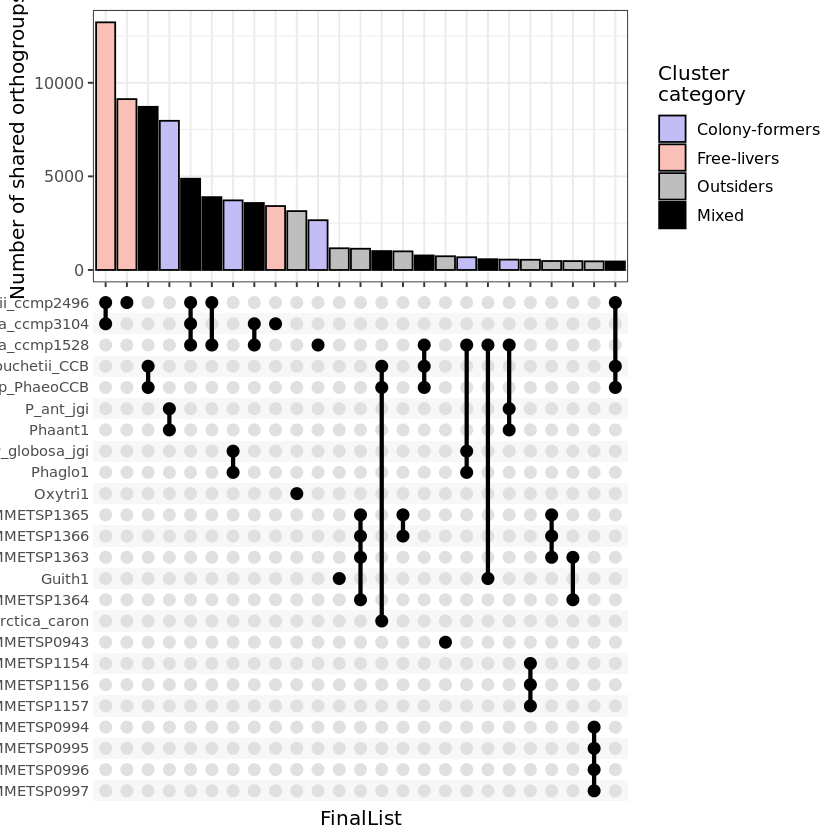

In [44]:
og_plot = ggplot(orthogroups_file_for_upset_named %>% 
    mutate(colonies = map(Grouping, str_detect, pattern = "Colony-former"),
           colonies = map_lgl(colonies, any))%>% 
    mutate(outgroup = map(Grouping, str_detect, pattern = "Outgroup"),
           outgroup = map_lgl(outgroup, any))%>% 
    mutate(freeliving = map(Grouping, str_detect, pattern = "Free-living"),
           freeliving = map_lgl(freeliving, any)) %>%
    dplyr::mutate(SummarizedGrouping=case_when((!freeliving)&(!outgroup)&colonies ~ "Colony-formers",
                                               (freeliving)&(!outgroup)&!colonies ~ "Free-livers",
                                               (!freeliving)&(outgroup)&!colonies ~ "Outsiders",
                                                  TRUE ~ "Mixed")),
       aes(x=FinalList)) +
    geom_bar(aes(fill=SummarizedGrouping),color="black") +
    scale_x_upset(n_intersections = 25) + 
    scale_fill_manual(breaks=c("Colony-formers","Free-livers","Outsiders","Mixed"),
                      values=c("#c2bdf5","#fabfb7","gray","black"),
                      name="Cluster\ncategory") + 
    ylab("Number of shared orthogroups")+ theme_bw(base_size=12)

og_plot

Scale for y is already
present.
Adding another scale for
y, which will replace the
existing scale.


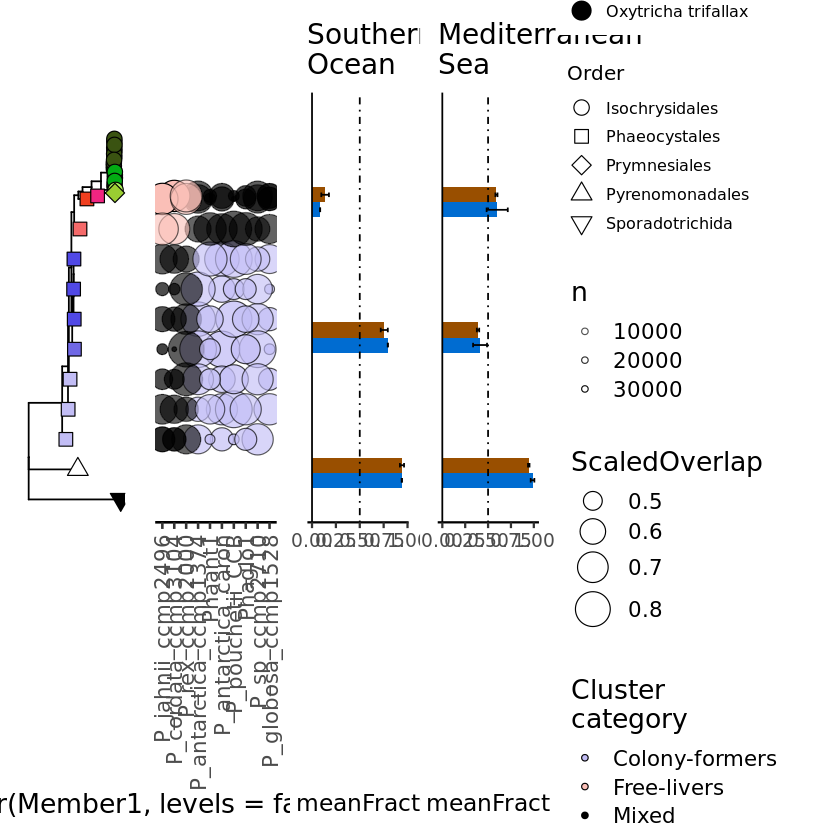

In [200]:
(((scaled_tree+theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.x=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "transparent"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+ylim(c(2,15)))|heatmap_plt|total_db_plot+ggtitle("Southern\nOcean")|
             total_db_plot_ms+ggtitle("Mediterranean\nSea")))+ 
        plot_layout(guides="collect",widths=c(1,1.2,1,1))
ggsave("new_tree.png",width=14,height=10,units="in",dpi=300)
ggsave("new_tree.pdf",width=14,height=12,units="in",dpi=300)

Scale for y is
already
present.
Adding another
scale for y,
which will
replace the
existing
scale.
Warning message:
“Removed 70675
rows
containing
non-finite
values
(`stat_count()`).”
Warning message:
“Removed 70675
rows
containing
non-finite
values
(`stat_count()`).”


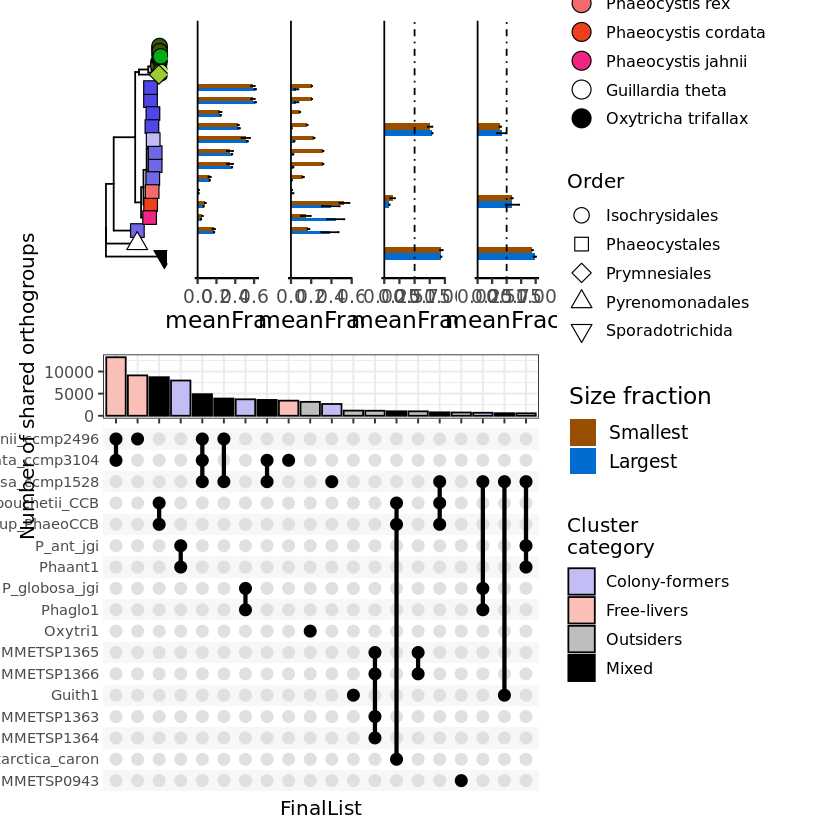

In [64]:
(((scaled_tree+theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.x=element_blank(),
        axis.line.y = element_line(colour = "transparent"),
        axis.line.x = element_line(colour = "transparent"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+ylim(c(2,20)))|abund_vals|abund_vals_ms|total_db_plot|total_db_plot_ms)/og_plot)+ 
        plot_layout(guides="collect",widths=c(1,1,1,1,1),heights=c(1,0.25))

ggsave("phaeo_tree_w_data_MS_OG.pdf",width=14,height=12,units="in")